# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
student_data = pd.DataFrame({'age':[17, 51, 27, 21, 36, 48, 19, 26, 54, 30],
                             'tardies':[10, 1, 5, 9, 4, 2, 9, 6, 0, 3],
                            }
                           )

Draw a dispersion diagram (scatter plot) for the data.

Text(0, 0.5, 'tardies')

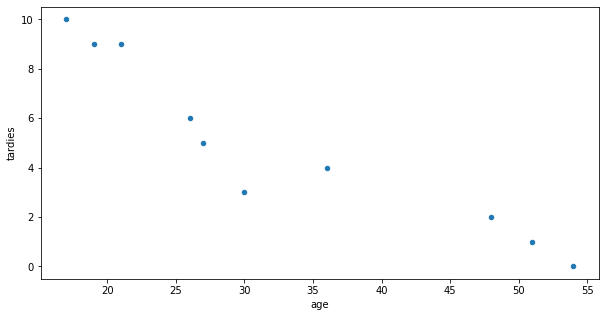

In [3]:
fig, ax = plt.subplots(figsize=(10,5))
student_data.plot(x='age', y='tardies', kind='scatter', ax=ax)
ax.set_xlabel('age')
ax.set_ylabel('tardies')

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

A trend is indeed visible. It seems there's a negative linear correlation between being late and age.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [4]:
student_data.cov()

age    tardies
age      187.655556 -45.566667
tardies  -45.566667  12.544444

Covariance table shows a that coming too late is negative correlated with age. If age rises, so the amount of people coming too late will drop. The measure however is unclear: Covariance is not standardized.

In [5]:
student_data.corr()

age   tardies
age      1.000000 -0.939163
tardies -0.939163  1.000000

Here, a good negative correlation (r = 0.94) between coming to late and age is obvious.

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [6]:
import statsmodels.api as sm

import numpy as np

student_data = student_data.assign(cst=1)
#student_data = student_data.astype(float)

y = student_data['tardies']
X = student_data[['cst','age']]
#X = smapi.add_constant(X)
result = sm.OLS(y,X)
results = result.fit()
results.summary()
print(result)

/home/flo/anaconda3/envs/ironhack/lib/python3.8/site-packages/scipy/stats/stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Plot your regression model on your scatter plot.

Text(0, 0.5, 'tardies')

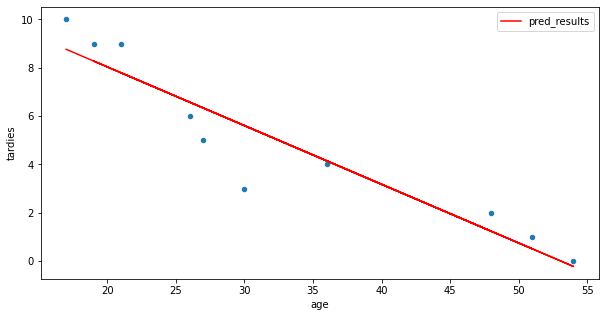

In [7]:
student_data = student_data.assign(pred_results=results.predict(student_data[['cst', 'age']]))


fig, ax = plt.subplots(figsize=(10,5))
student_data.plot(x='age', y='tardies', kind='scatter', ax=ax)
student_data.plot(x='age', y='pred_results', kind='line', ax=ax, c='r')

#smapi.graphics.abline_plot(model_results=results, color="green", ax=ax)
ax.set_xlabel('age')
ax.set_ylabel('tardies')

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

age seems a good predictor for tardiness at least based on that sample size. The correlation coefficient is reasonably high with 0.93 and the calculated coefficients (intercept and slope) have a sufficiently small std error (below 10%) and the R² value indicates that 88% of the observations of tardiness can be explained by our model

In [8]:
results.summary()

/home/flo/anaconda3/envs/ironhack/lib/python3.8/site-packages/scipy/stats/stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Tue, 30 Jun 2020   Prob (F-statistic):           5.57e-05
Time:                        16:52:21   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cst           12.8888      1.111     11.605      0.000      10.328      15.450
age           -0.2428      0.031     -7.734      0.000      -0.315      -0.170
==============================================================================
Omnibus:                        3.949   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                1.714
Skew:                          -1.014   Prob(JB):                        0.424
Kurtosis:                       3.069   Cond. No.                         96.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [9]:
import pandas as pd
import seaborn as sns
import numpy as np
df_v = pd.read_csv('vehicles.csv')
df_v = df_v.select_dtypes(include=np.number)

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

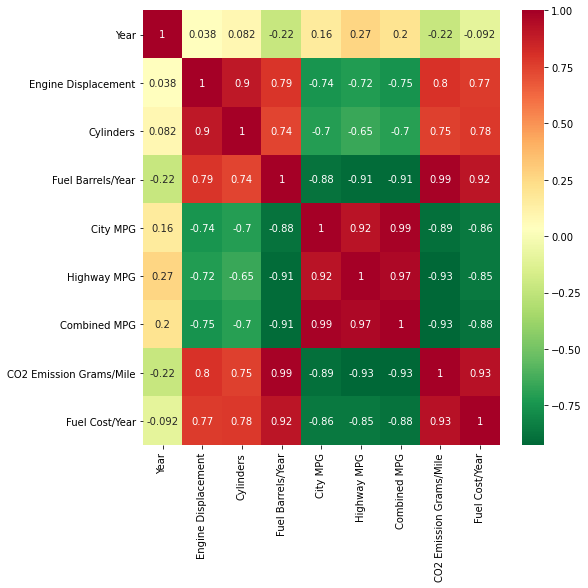

In [10]:
plt.figure(figsize=(8,8))
sns.heatmap(df_v.corr(), annot=True, cmap='RdYlGn_r')

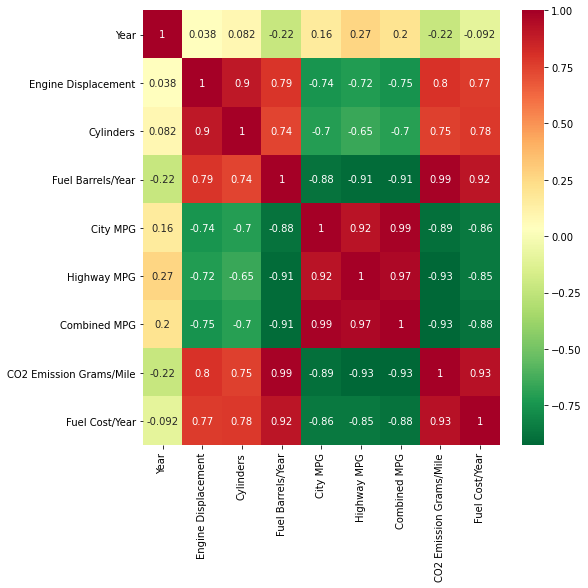

In [11]:
# Testing, if we obtain a different result, when standardizing first:
from sklearn import preprocessing

x = df_v.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_v_std=pd.DataFrame(x_scaled, columns=df_v.columns)

plt.figure(figsize=(8,8))
sns.heatmap(df_v_std.corr(), annot=True, cmap='RdYlGn_r')

In [12]:
df_v

Year  Engine Displacement  Cylinders  Fuel Barrels/Year  City MPG  \
0      1984                  2.5        4.0          19.388824        18   
1      1984                  4.2        6.0          25.354615        13   
2      1985                  2.5        4.0          20.600625        16   
3      1985                  4.2        6.0          25.354615        13   
4      1987                  3.8        6.0          20.600625        14   
...     ...                  ...        ...                ...       ...   
35947  2013                  1.0        3.0           9.155833        34   
35948  2014                  1.0        3.0           9.155833        34   
35949  2015                  1.0        3.0           9.155833        34   
35950  2016                  0.9        3.0           9.155833        34   
35951  2016                  0.9        3.0           9.417429        32   

       Highway MPG  Combined MPG  CO2 Emission Grams/Mile  Fuel Cost/Year  
0               17            17               522.764706            1950  
1               13            13               683.615385            2550  
2               17            16               555.437500            2100  
3               13            13               683.615385            2550  
4               21            16               555.437500            2550  
...            ...           ...                      ...             ...  
35947           38            36               244.000000            1100  
35948           38            36               243.000000            1100  
35949           38            36               244.000000            1100  
35950           39            36               246.000000            1100  
35951           39            35               255.000000            1150  

[35952 rows x 9 columns]

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [22]:
import pandas_profiling
df_v.profile_report()

In [25]:
df_v = df_v.assign(const=1)

df_v_x = df_v[['const', 'Year', 'Engine Displacement', 'Cylinders', 'Fuel Barrels/Year',
       'City MPG', 'Highway MPG', 'Combined MPG',
       'Fuel Cost/Year']]
df_v_y = df_v['CO2 Emission Grams/Mile']

y = df_v_y
X = df_v_x
#X = smapi.add_constant(X)
result = sm.OLS(y,X)
results = result.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.983
Model:                                 OLS   Adj. R-squared:                  0.983
Method:                      Least Squares   F-statistic:                 2.559e+05
Date:                     Tue, 30 Jun 2020   Prob (F-statistic):               0.00
Time:                             17:13:06   Log-Likelihood:            -1.4987e+05
No. Observations:                    35952   AIC:                         2.998e+05
Df Residuals:                        35943   BIC:                         2.998e+05
Df Model:                                8                                         
Covariance Type:                 nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 764.3433     18.897     40.448      0.000     727.304     801.382
Year                   -0.3066      0.009    -32.300      0.000      -0.325      -0.288
Engine Displacement     6.6593      0.160     41.543      0.000       6.345       6.974
Cylinders              -1.1563      0.120     -9.649      0.000      -1.391      -0.921
Fuel Barrels/Year      17.4507      0.064    274.510      0.000      17.326      17.575
City MPG                0.8706      0.156      5.585      0.000       0.565       1.176
Highway MPG            -2.4132      0.089    -27.094      0.000      -2.588      -2.239
Combined MPG           -1.3730      0.229     -5.991      0.000      -1.822      -0.924
Fuel Cost/Year          0.0376      0.000     80.102      0.000       0.037       0.038
==============================================================================
Omnibus:                    65974.989   Durbin-Watson:                   0.785
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        162004990.275
Skew:                          13.520   Prob(JB):                         0.00
Kurtosis:                     330.744   Cond. No.                     6.36e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.36e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

Based on the resulting parameters of our model, it can be derived, that:
    * With every passing year, the amount of emitted CO2 per Mile decreases by *0.3066* grams, given, that all other variables remain constant.
    * etc....
    
The most impactful variable according to the model is obviously the fuel consumption **Fuel Barrels/Year**. An increase here of 1 Barrel per year leads to an increase of 17.45 grams CO2 per Mile.

Confidence:
* The R² value of 0.98 indicates that the model can explain the most of the values
* The p-values of 0 for all regressors indicate, that they have all important influence on the target variable of fuel consumption

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [27]:
df = pd.DataFrame({'invited':[1,3,4,6,8,9,11,14], 'attended':[1,2,4,4,5,7,8,13]})
df

invited  attended
0        1         1
1        3         2
2        4         4
3        6         4
4        8         5
5        9         7
6       11         8
7       14        13

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

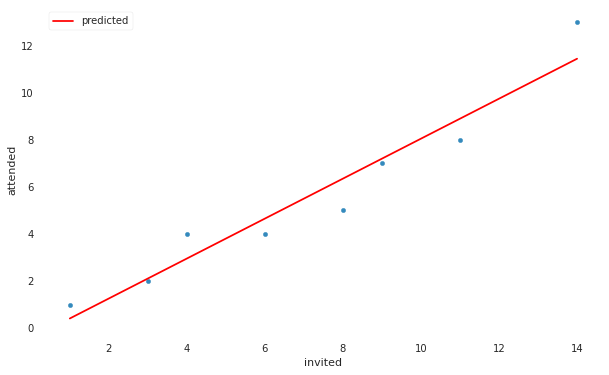

In [33]:
df = df.assign(cst=1)

y = df['attended']
X = df[['cst','invited']]
#X = smapi.add_constant(X)
result = sm.OLS(y,X)
results = result.fit()
#results.summary()
df = df.assign(predicted=results.predict(X))

fig, ax = plt.subplots(figsize=(10,6))
df.plot(x='invited', y='attended', kind='scatter', ax=ax)
df.plot(x='invited', y='predicted', kind='line', ax=ax, c='r')

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [17]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

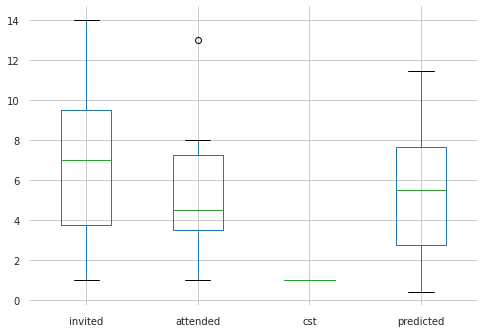

In [34]:
df.boxplot()

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [35]:
df.head()

invited  attended  cst  predicted
0        1         1    1   0.409091
1        3         2    1   2.106061
2        4         4    1   2.954545
3        6         4    1   4.651515
4        8         5    1   6.348485

In [39]:
df = df.assign(residuals=abs(df['predicted']-df['attended']))

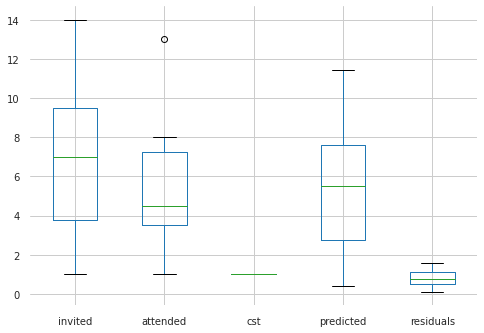

In [40]:
df.boxplot()